# GTZAN Dataset - Music Genre Classification

Introduction
Music Experts have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.
This data hopefully can give the opportunity to do just that.

# Content

Genres original -
A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds) images original - A visual representation for each audio file. One way to classify data is through neural networks. Because NNs (like CNN, what we will be using today) usually take in some sort of image representation, the audio files were converted to Mel Spectrograms to make this possible.

2 CSV files -
Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models). With data, more is always better.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

import librosa
import librosa.display


import warnings
warnings.filterwarnings('ignore')

epochs_all = 500
NUM_CLASSES = 10 

In [2]:
path = "Data"
genres = os.listdir(os.path.join(path, "genres_original/"))
print(genres)

['rock', 'metal', 'disco', 'hiphop', 'blues', 'reggae', 'pop', 'country', 'classical', 'jazz']


# Explore Audio Data
We will use librosa, which is the mother of audio files.

# Understanding Audio
Let's first Explore our Audio Data to see how it looks (we'll work with reggae.00036.wav file).

Sound: sequence of vibrations in varying pressure strengths (y)
The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz

In [3]:
# Importing 1 file
y, sr = librosa.load(f"Data/genres_original/reggae/reggae.00036.wav")

print("y:", y, "\n")
print("y shape:", np.shape(y), "\n")
print("Sample Rate (KHz):", sr, "\n")

# Verify length of the audio
print("Check Len of Audio:", 661794 / 22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [4]:
audio, _ = librosa.effects.trim(y)
print("y: ", y, "\n")
print("Duration :", audio.shape[0] / sr)

y:  [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Duration : 30.013333333333332


In [5]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print("Audio File:", audio_file, "\n")
print("Audio File shape:", np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


# 2D Representation: Sound Waves

Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others

Text(0.5, 1.0, 'Sound Waves in Reggae 36')

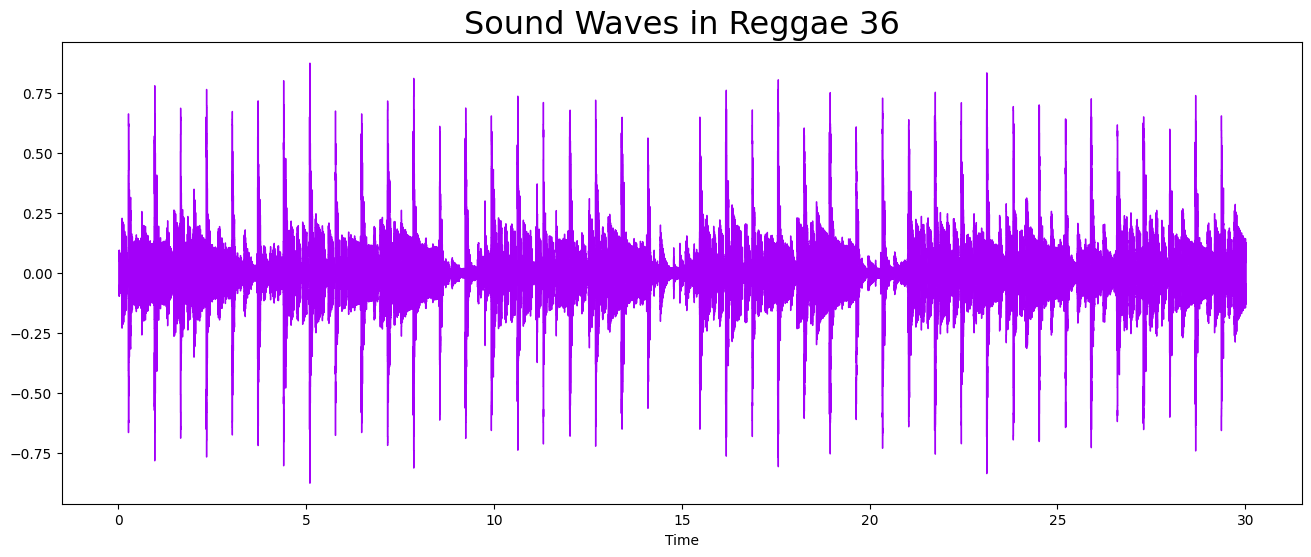

In [6]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, color="#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize=23)

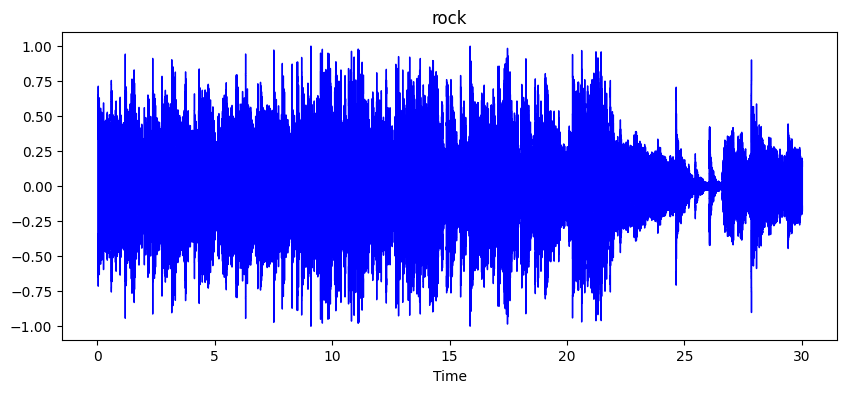

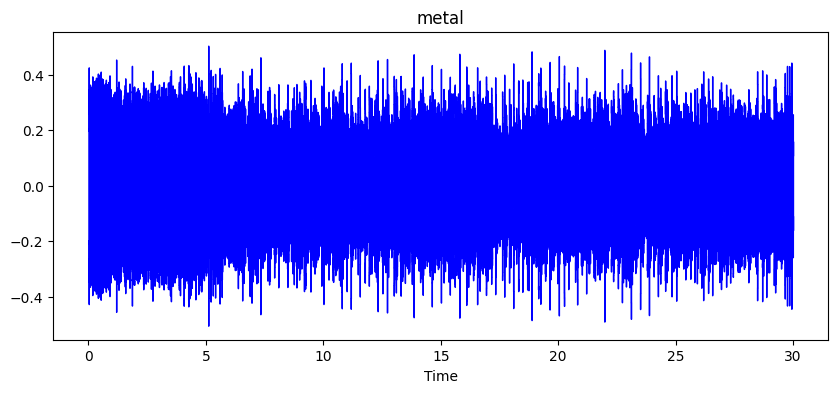

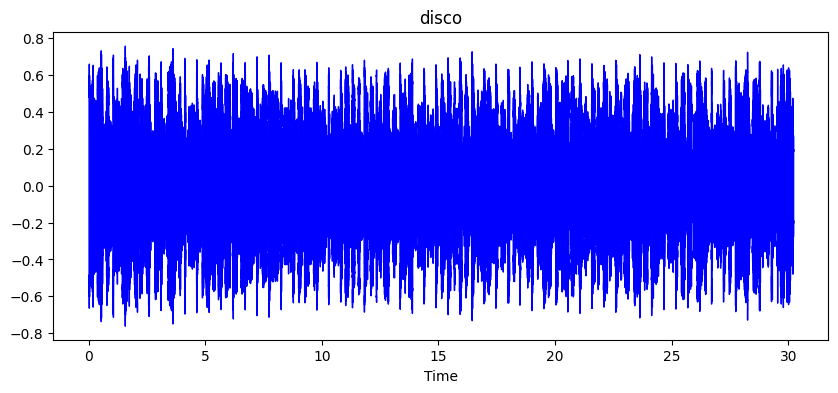

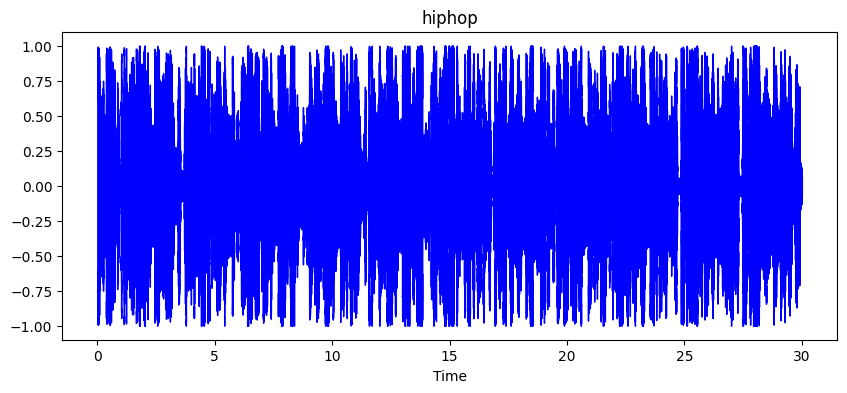

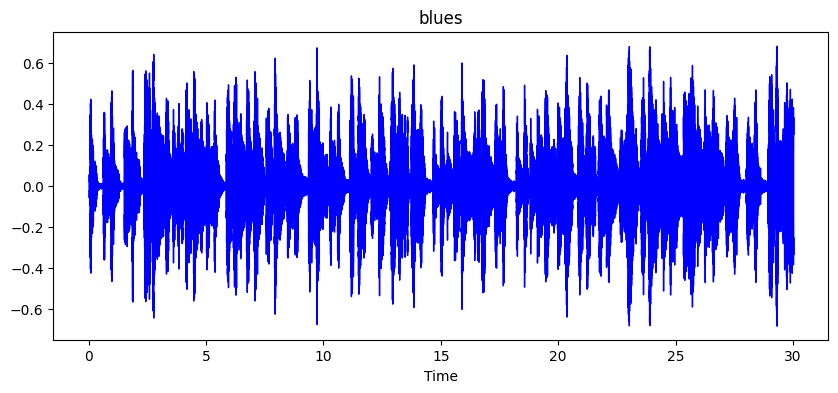

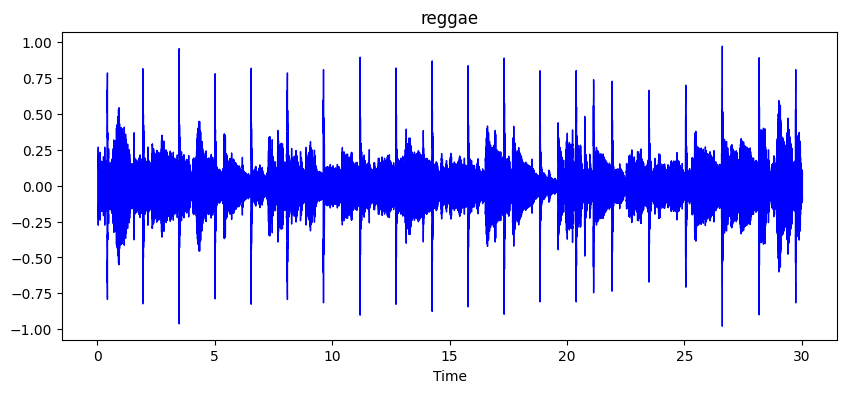

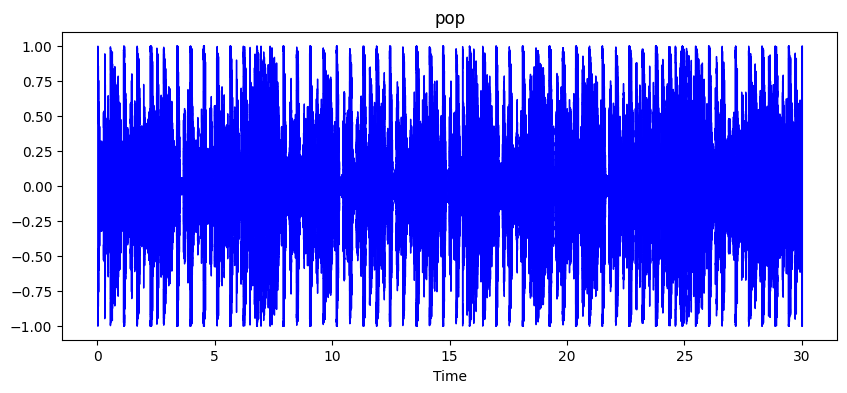

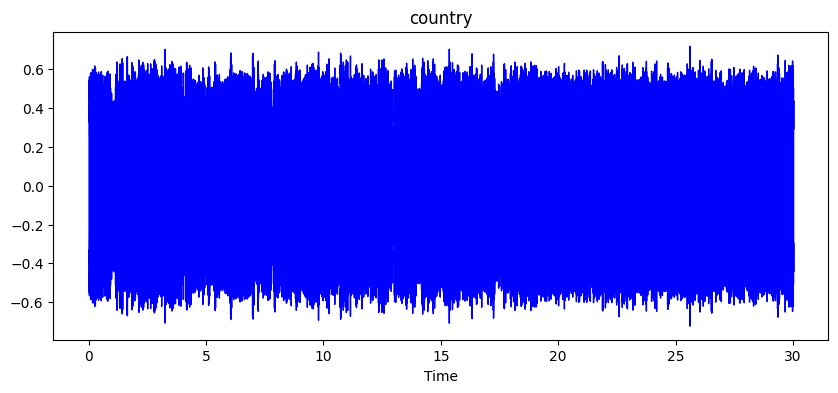

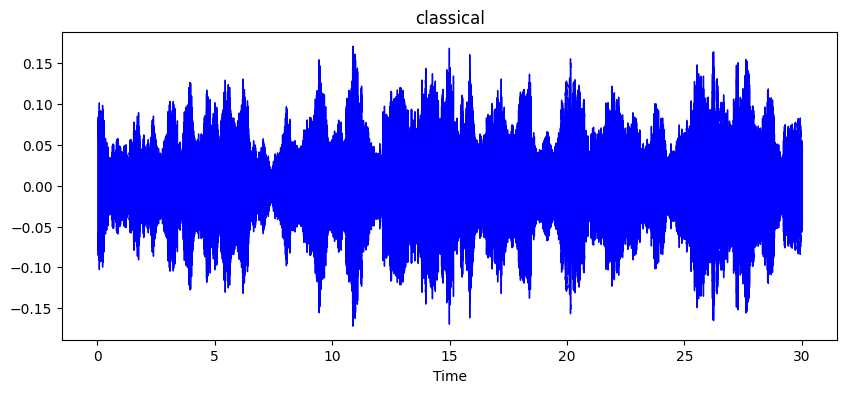

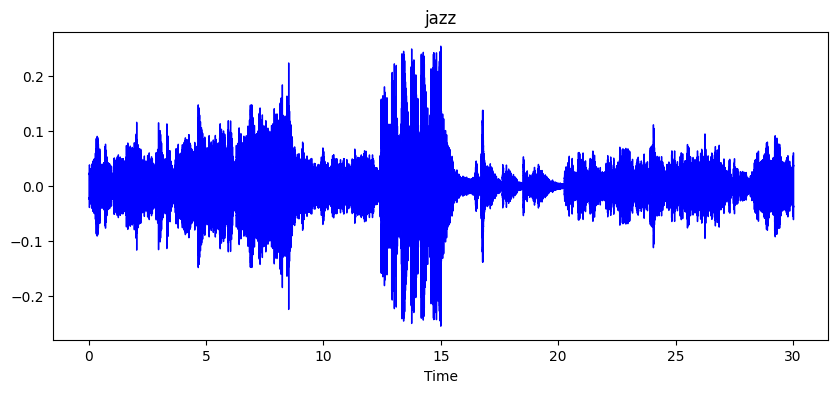

In [7]:
for i in genres:
    aud, sr = librosa.load(os.path.join(path, "genres_original", i, f"{i}.00001.wav"))
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y=aud, sr=sr, color="b")
    plt.title(f"{i}")

# Fourier Transform
Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

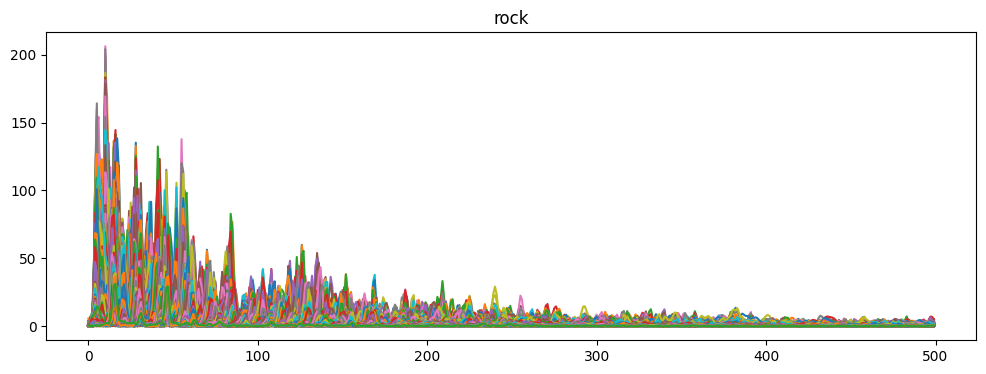

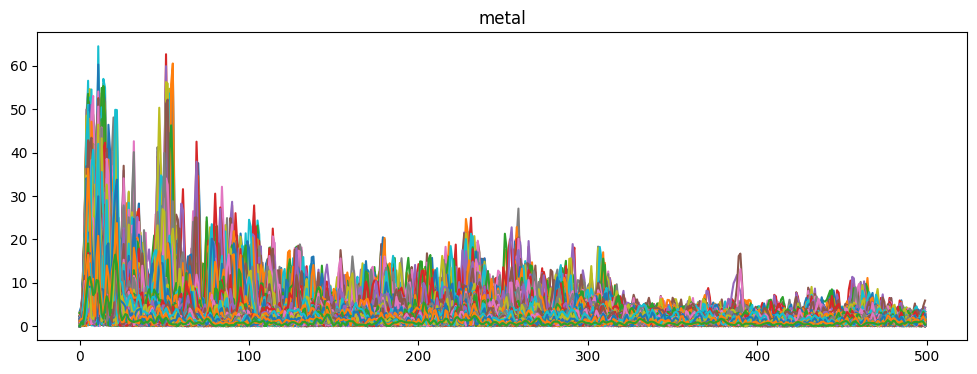

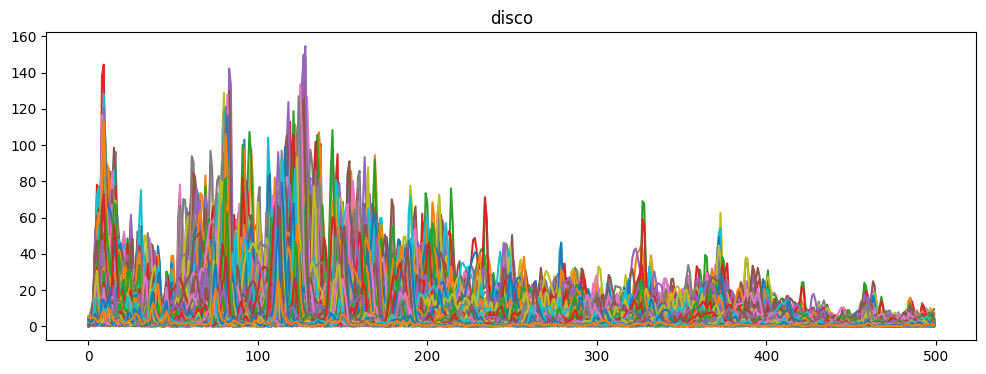

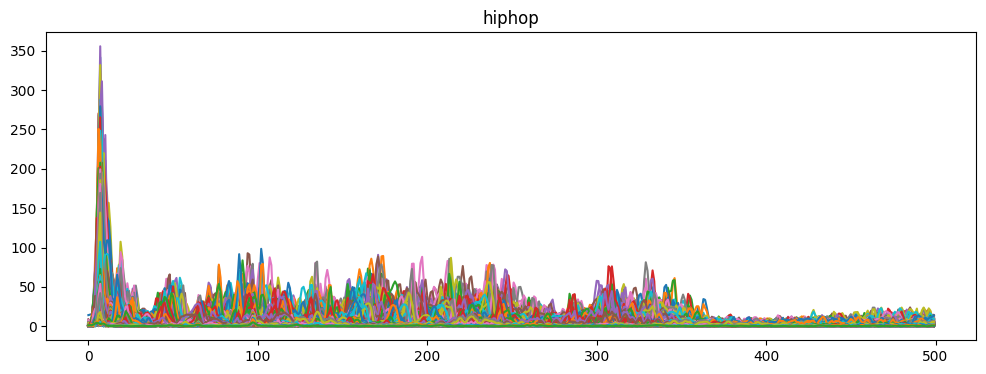

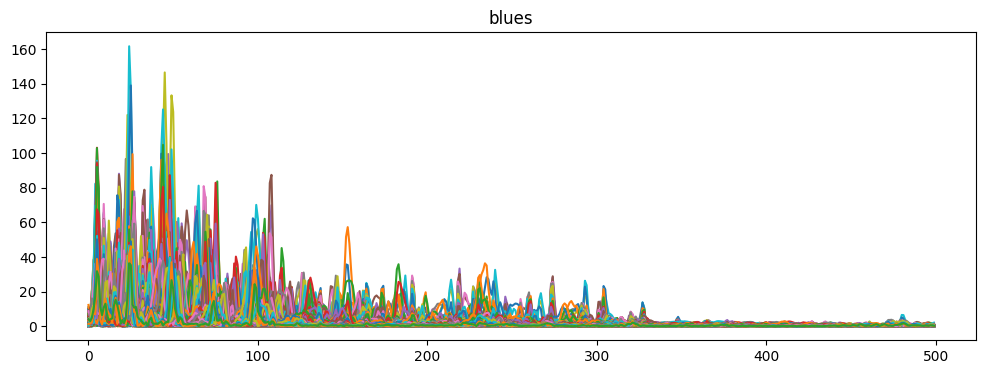

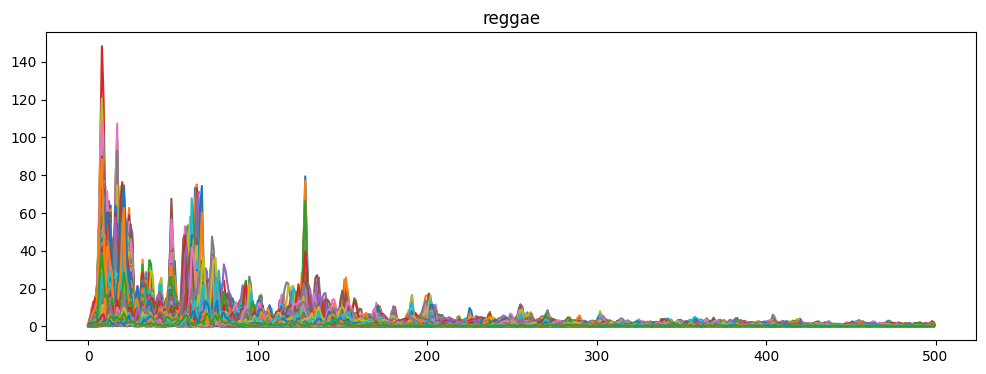

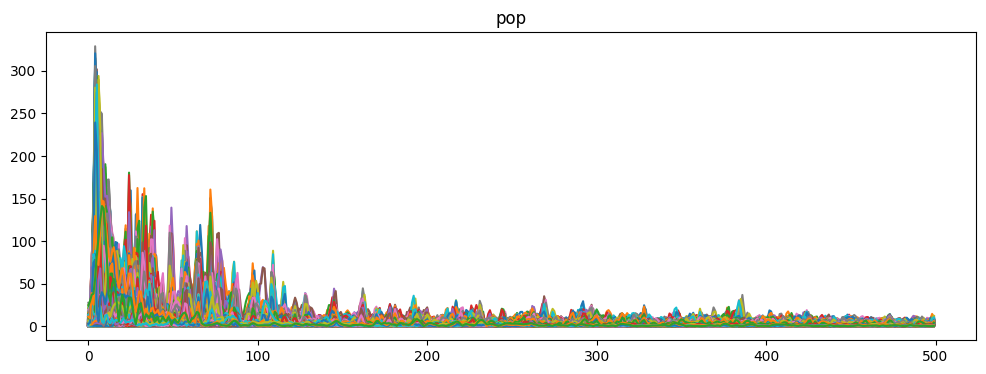

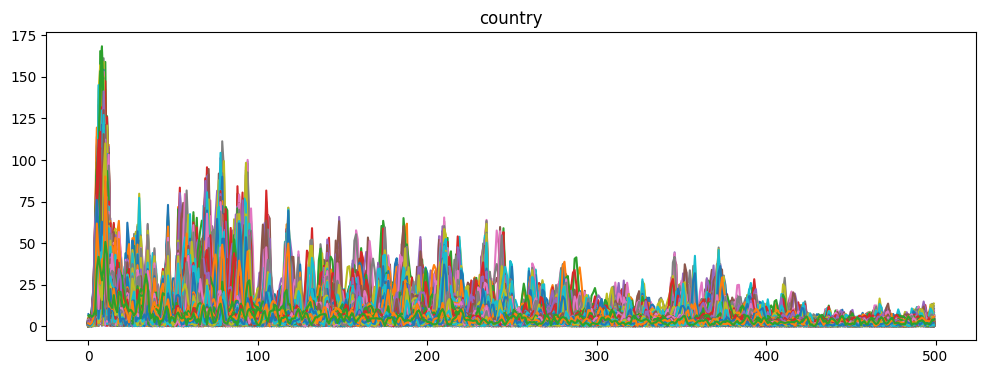

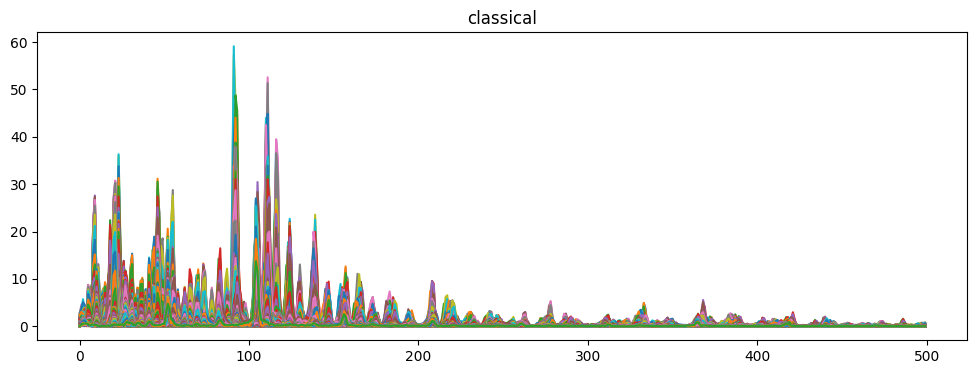

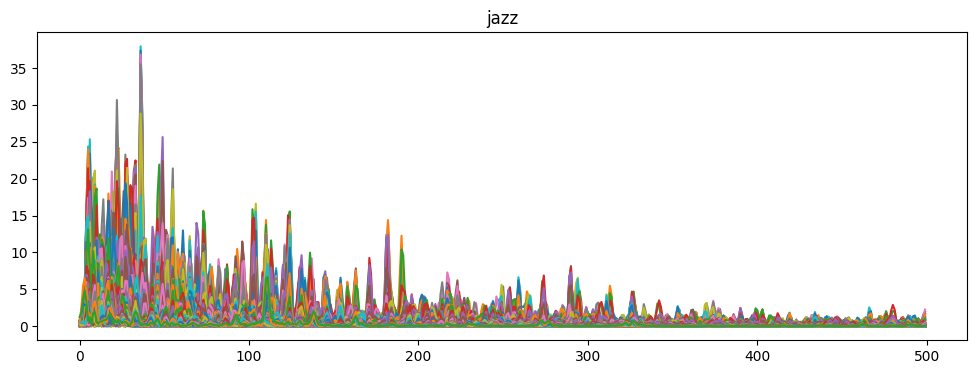

In [8]:
n_fft = 2048  # default value recommended, n_ftt represents the number of samples that will be converted at once.
hop_length = 512  # understandable by name
win_length = 2048  # window using which samples are converted.

for i in genres:
    aud, sr = librosa.load(os.path.join(path, "genres_original", i, f"{i}.00001.wav"))
    aud_ft = np.abs(
        librosa.stft(aud, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    )
    #     print(np.shape(aud_ft)) #(1025,1302)
    plt.figure(figsize=(12, 4))
    plt.plot(aud_ft[:500, :])  # viewing only upto 500 Hz
    plt.title(f"{i}")

# The Spectrogram
What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
Here we convert the frequency axis to a logarithmic one.

In [9]:
# Default FFT window size
n_fft = 2048  # FFT window size
hop_length = (
    512  # number audio of frames between STFT columns (looks like a good default)
)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print("Shape of D object:", np.shape(D))

Shape of D object: (1025, 1293)


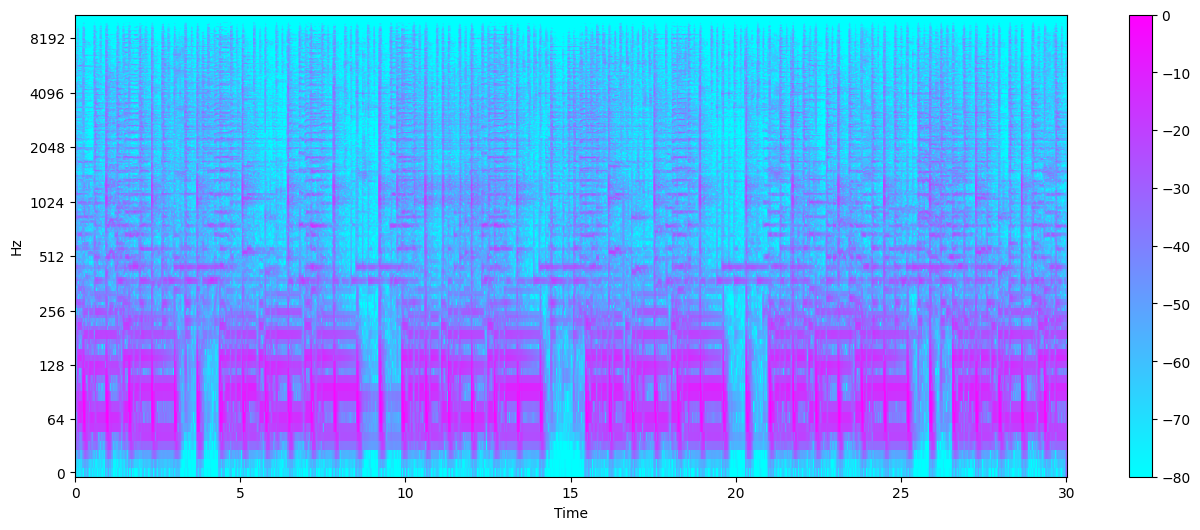

In [10]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref=np.max)

# Creating the Spectogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(
    DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log", cmap="cool"
)
plt.colorbar()

# Mel Spectrogram
The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

Text(0.5, 1.0, 'Metal Mel Spectrogram')

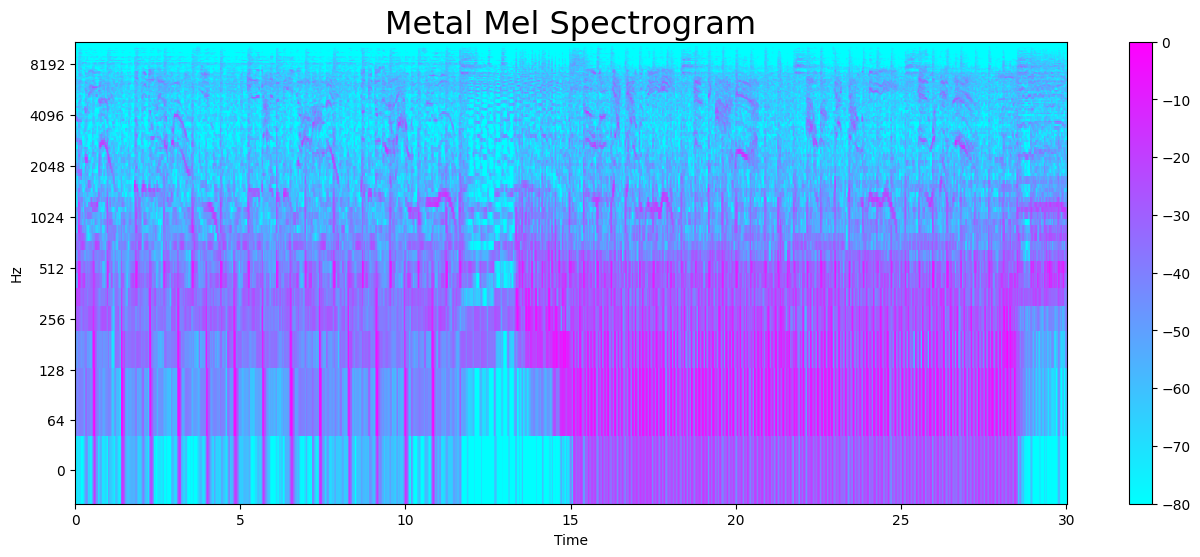

In [11]:
y, sr = librosa.load(f"Data/genres_original/metal/metal.00036.wav")
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(
    S_DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log", cmap="cool"
)
plt.colorbar()
plt.title("Metal Mel Spectrogram", fontsize=23)

# Audio Features
Zero Crossing Rate

the rate at which the signal changes from positive to negative or back.

In [12]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


# Harmonics and Perceptrual

Harmonics are characteristichs that human years can't distinguish (represents the sound color)

Perceptrual understanding shock wave represents the sound rhythm and emotion

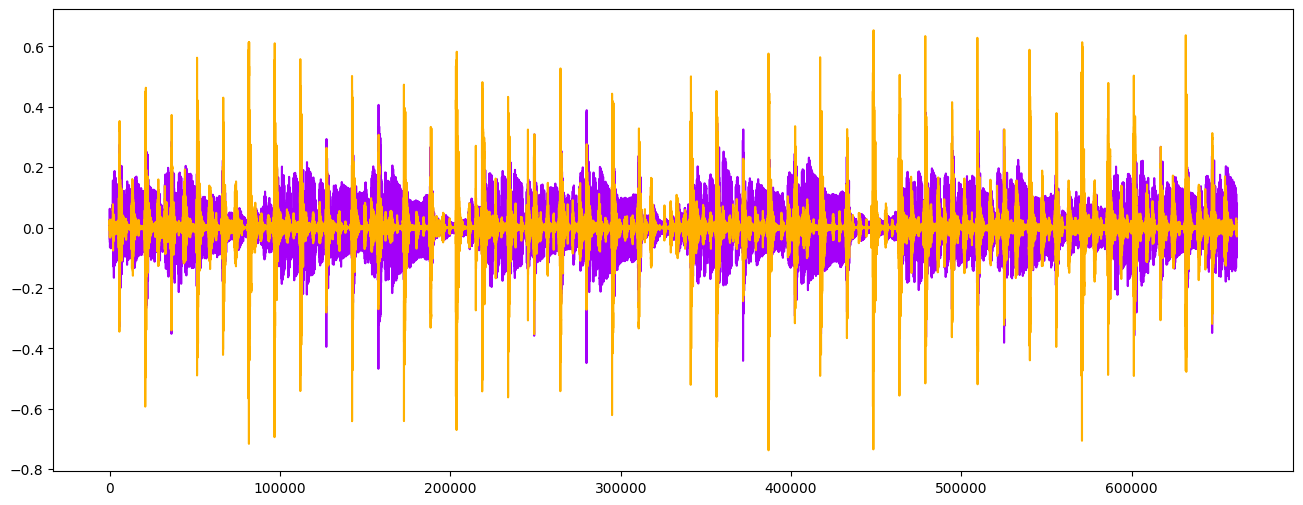

In [13]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color="#A300F9")
plt.plot(y_perc, color="#FFB100")

# Tempo BMP (beats per minute)
Dynamic programming beat tracker

In [14]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
tempo

143.5546875

# Spectral Centroid
indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [15]:
# frequencies present in the sound.
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print("Centroids:", spectral_centroids, "\n")
print("Shape of Spectral Centroids:", spectral_centroids.shape, "\n")

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print("frames:", frames, "\n")
print("t:", t)


# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476432 1946.74243678 2038.8113414  ...  766.50416352 1041.07728901
 1391.05145642] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


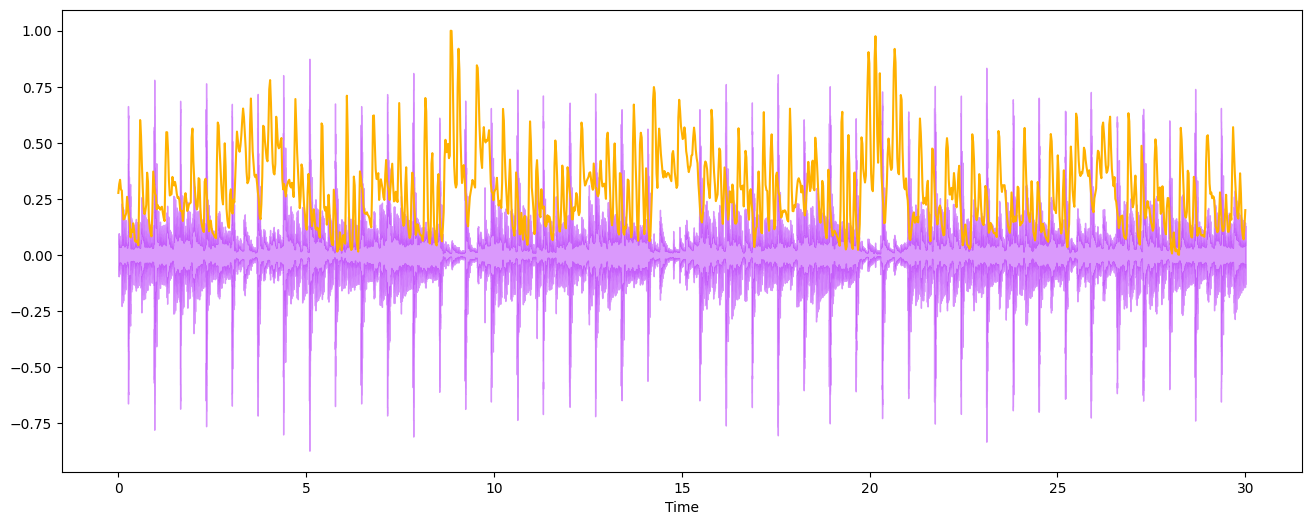

In [16]:
# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color="#A300F9")
plt.plot(t, normalize(spectral_centroids), color="#FFB100")

# Spectral Rolloff
is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

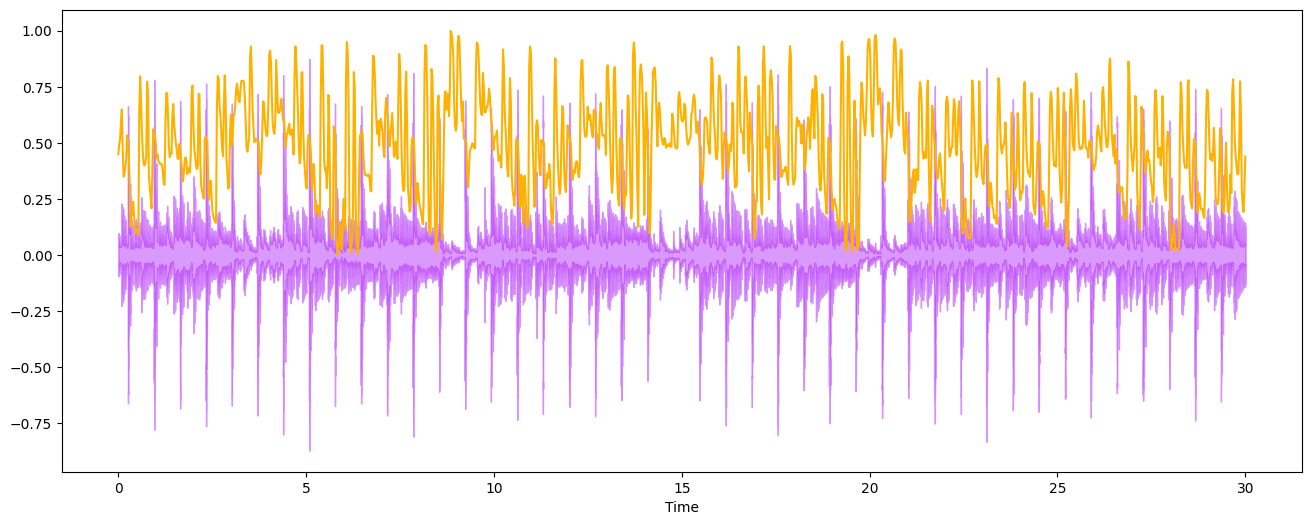

In [17]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize=(16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color="#A300F9")
plt.plot(t, normalize(spectral_rolloff), color="#FFB100")

# Mel-Frequency Cepstral Coefficients:
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


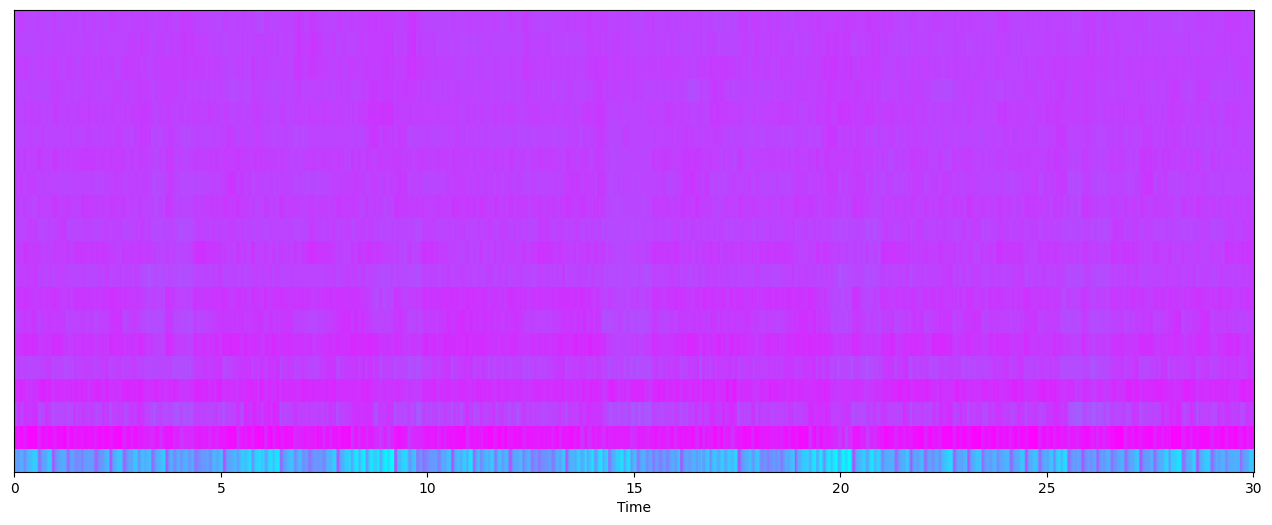

In [18]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print("mfccs shape:", mfccs.shape)

# Displaying  the MFCCs:
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="cool")

Mean: -1.1801075e-09 

Var: 1.0000001


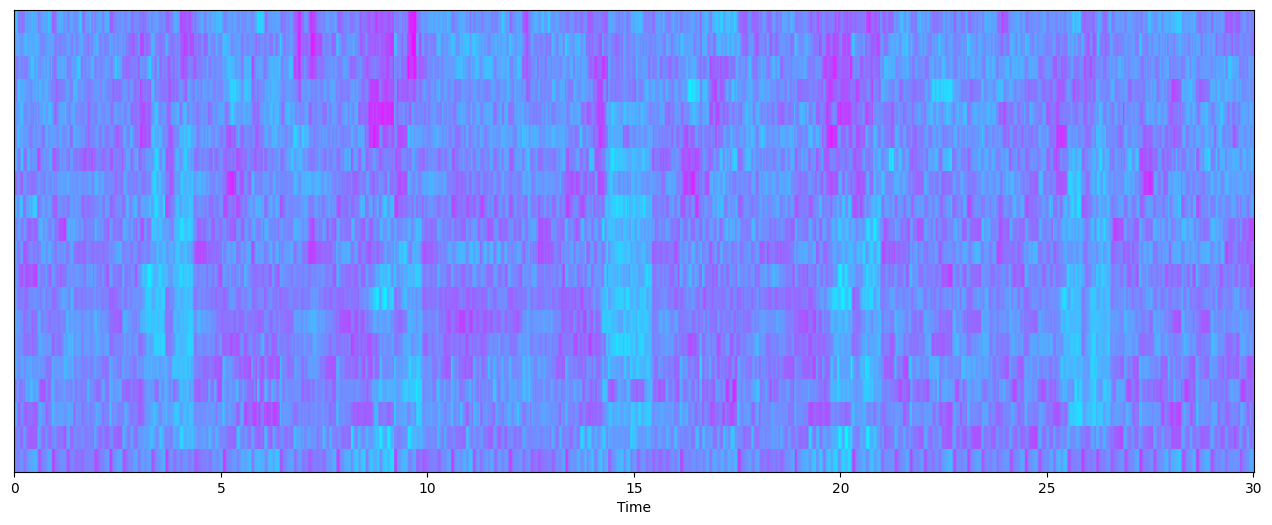

In [19]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print("Mean:", mfccs.mean(), "\n")
print("Var:", mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="cool")

# Chroma Frequencies
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.


It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation

Chromogram shape: (12, 133)


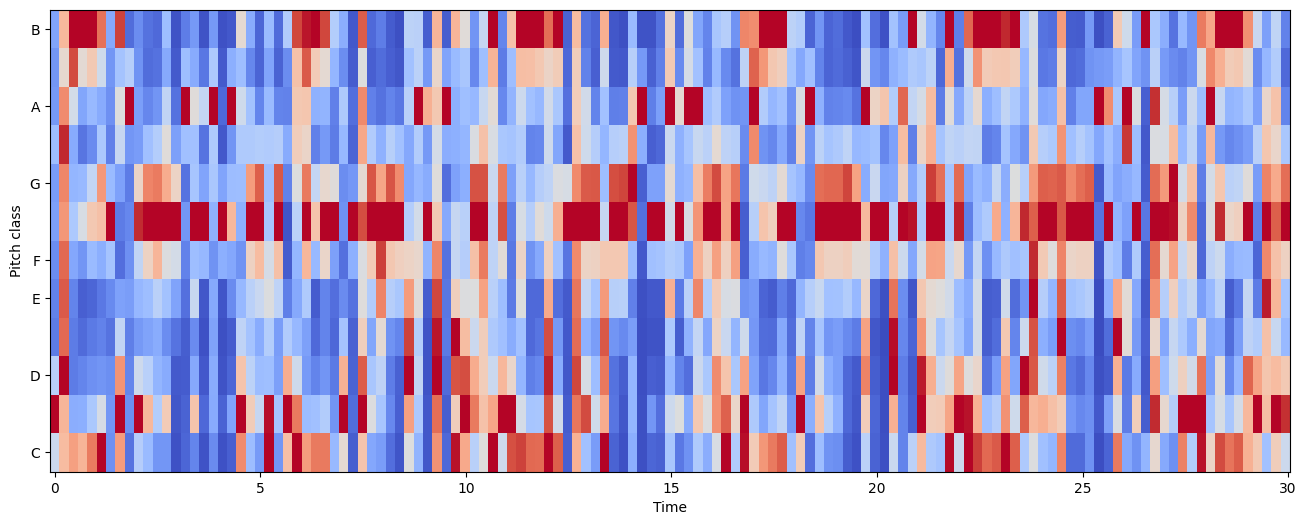

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print("Chromogram shape:", chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(
    chromagram, x_axis="time", y_axis="chroma", hop_length=hop_length, cmap="coolwarm"
)

In [21]:
data = pd.read_csv(f"Data/features_30_sec.csv")
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

# Correlation between features

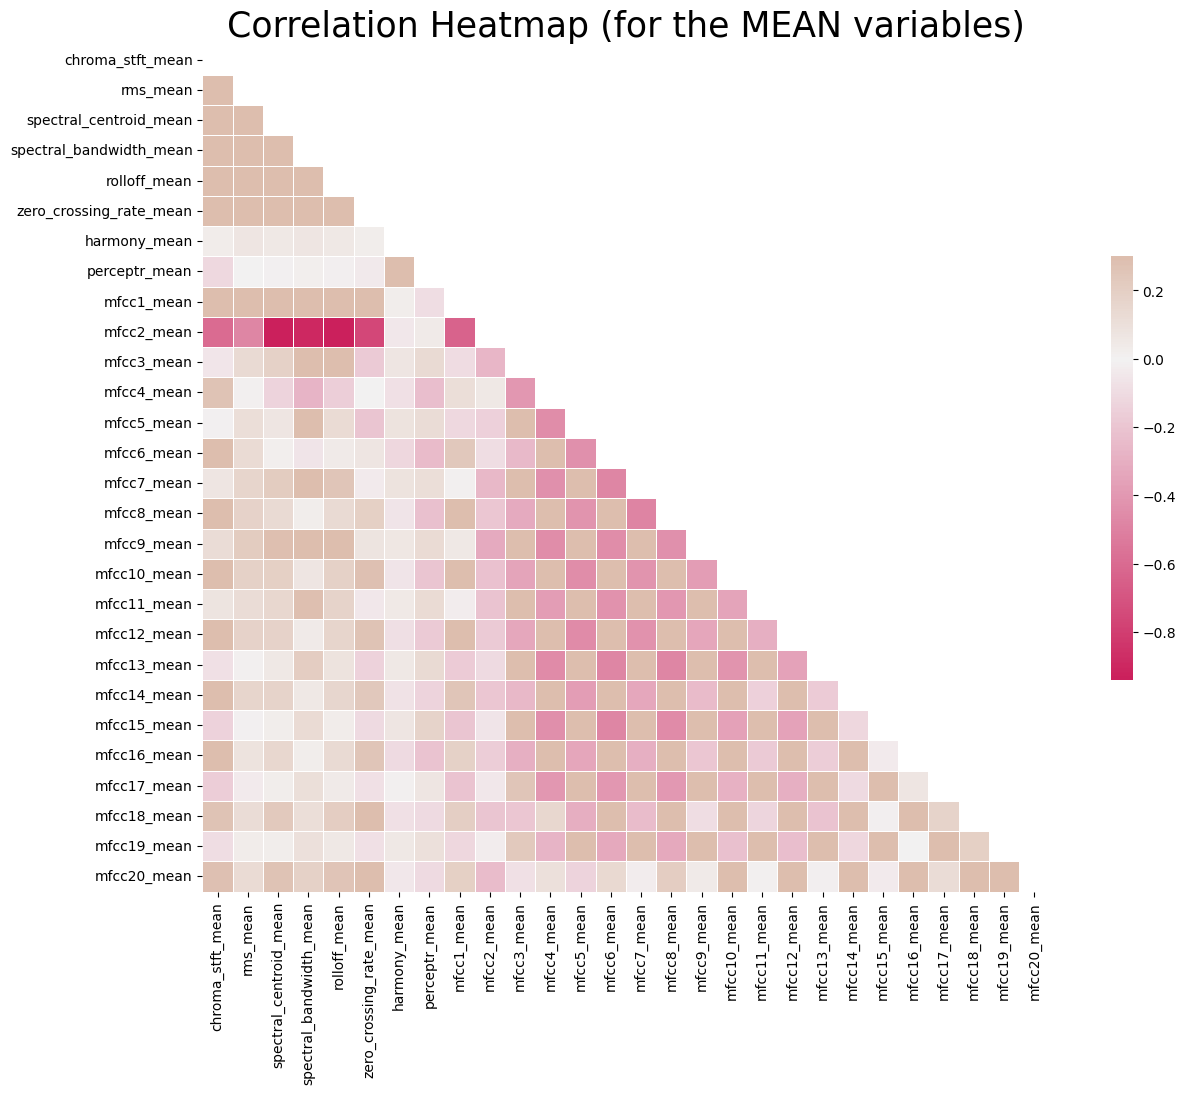

In [22]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if "mean" in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlation Heatmap (for the MEAN variables)", fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Corr Heatmap.jpg")

# Box Plot for Genres Distributions

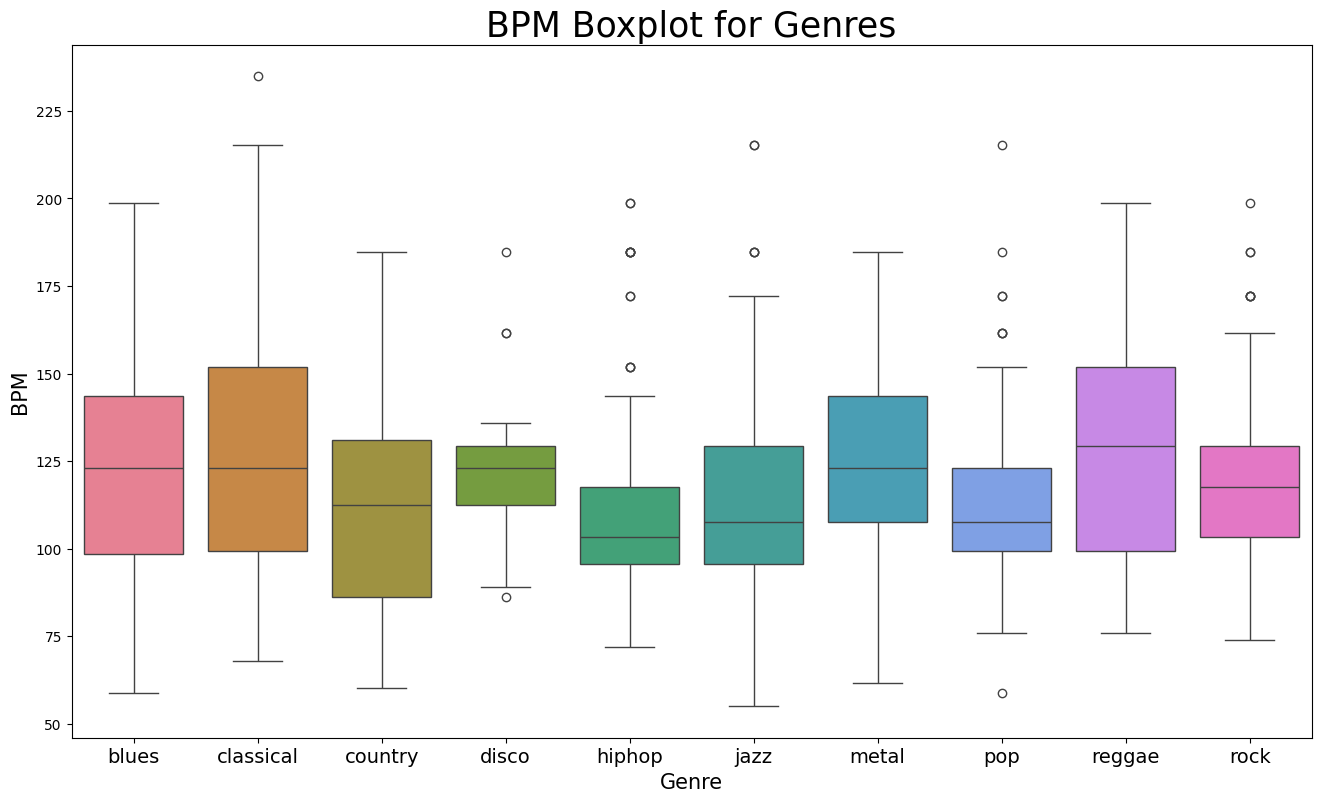

In [23]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette="husl")

plt.title("BPM Boxplot for Genres", fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.savefig("BPM Boxplot.jpg")

# Principal Component Analysis - to visualize possible groups of genres


1.Normalization

2.PCA

3.The Scatter Plot

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

In [24]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data["label"]
X = data.loc[:, data.columns != "label"]

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(
    data=principalComponents, columns=["principal component 1", "principal component 2"]
)

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis=1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

# Machine Learning Classification
Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Reading in the Data
Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [26]:
data = pd.read_csv(f"Data/features_3_sec.csv")
data = data.iloc[0:, 1:]
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

# Features and Target variable

creates the target and feature variables

normalizes the data

In [27]:
y = data["label"]  # genre variable.
X = data.loc[:, data.columns != "label"]  # select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns=cols)

Splitting the data into training and testing
70% - 30% split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Creating a Predefined function to assess the accuracy of a model

input is the model

fits the model on the training dataset

predicts on the testing features

compares the predictions with the actuals

In [29]:
def model_assess(model, title="Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    # print(confusion_matrix(y_test, preds))
    print("Accuracy", title, ":", round(accuracy_score(y_test, preds), 5), "\n")

# Trying different models to assess their performance


In [30]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial")
model_assess(lg, "Logistic Regression")

Accuracy Naive Bayes : 0.51952 

Accuracy Stochastic Gradient Descent : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Decission trees : 0.64264 

Accuracy Random Forest : 0.81415 

Accuracy Support Vector Machine : 0.75409 

Accuracy Logistic Regression : 0.6977 



In [31]:
from tensorflow import keras
from keras.models import Sequential
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

2023-10-22 06:12:13.183733: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 06:12:13.210442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 06:12:13.210477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 06:12:13.210511: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 06:12:13.217320: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 06:12:13.217763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [32]:
# To convert categorical data into model-understandable numerica data
class_list = data.iloc[:, -1]
convertor = LabelEncoder()

In [33]:
# Fitting the label encoder & return encoded labels
y = convertor.fit_transform(class_list)

In [34]:
print(data.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [35]:
# Standard scaler is used to standardize features & look like standard normally distributed data
fit = StandardScaler()
X = fit.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [37]:
# The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics="accuracy"
    )
    return model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
    )

In [38]:
# Plotting the curves
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

<Axes: >

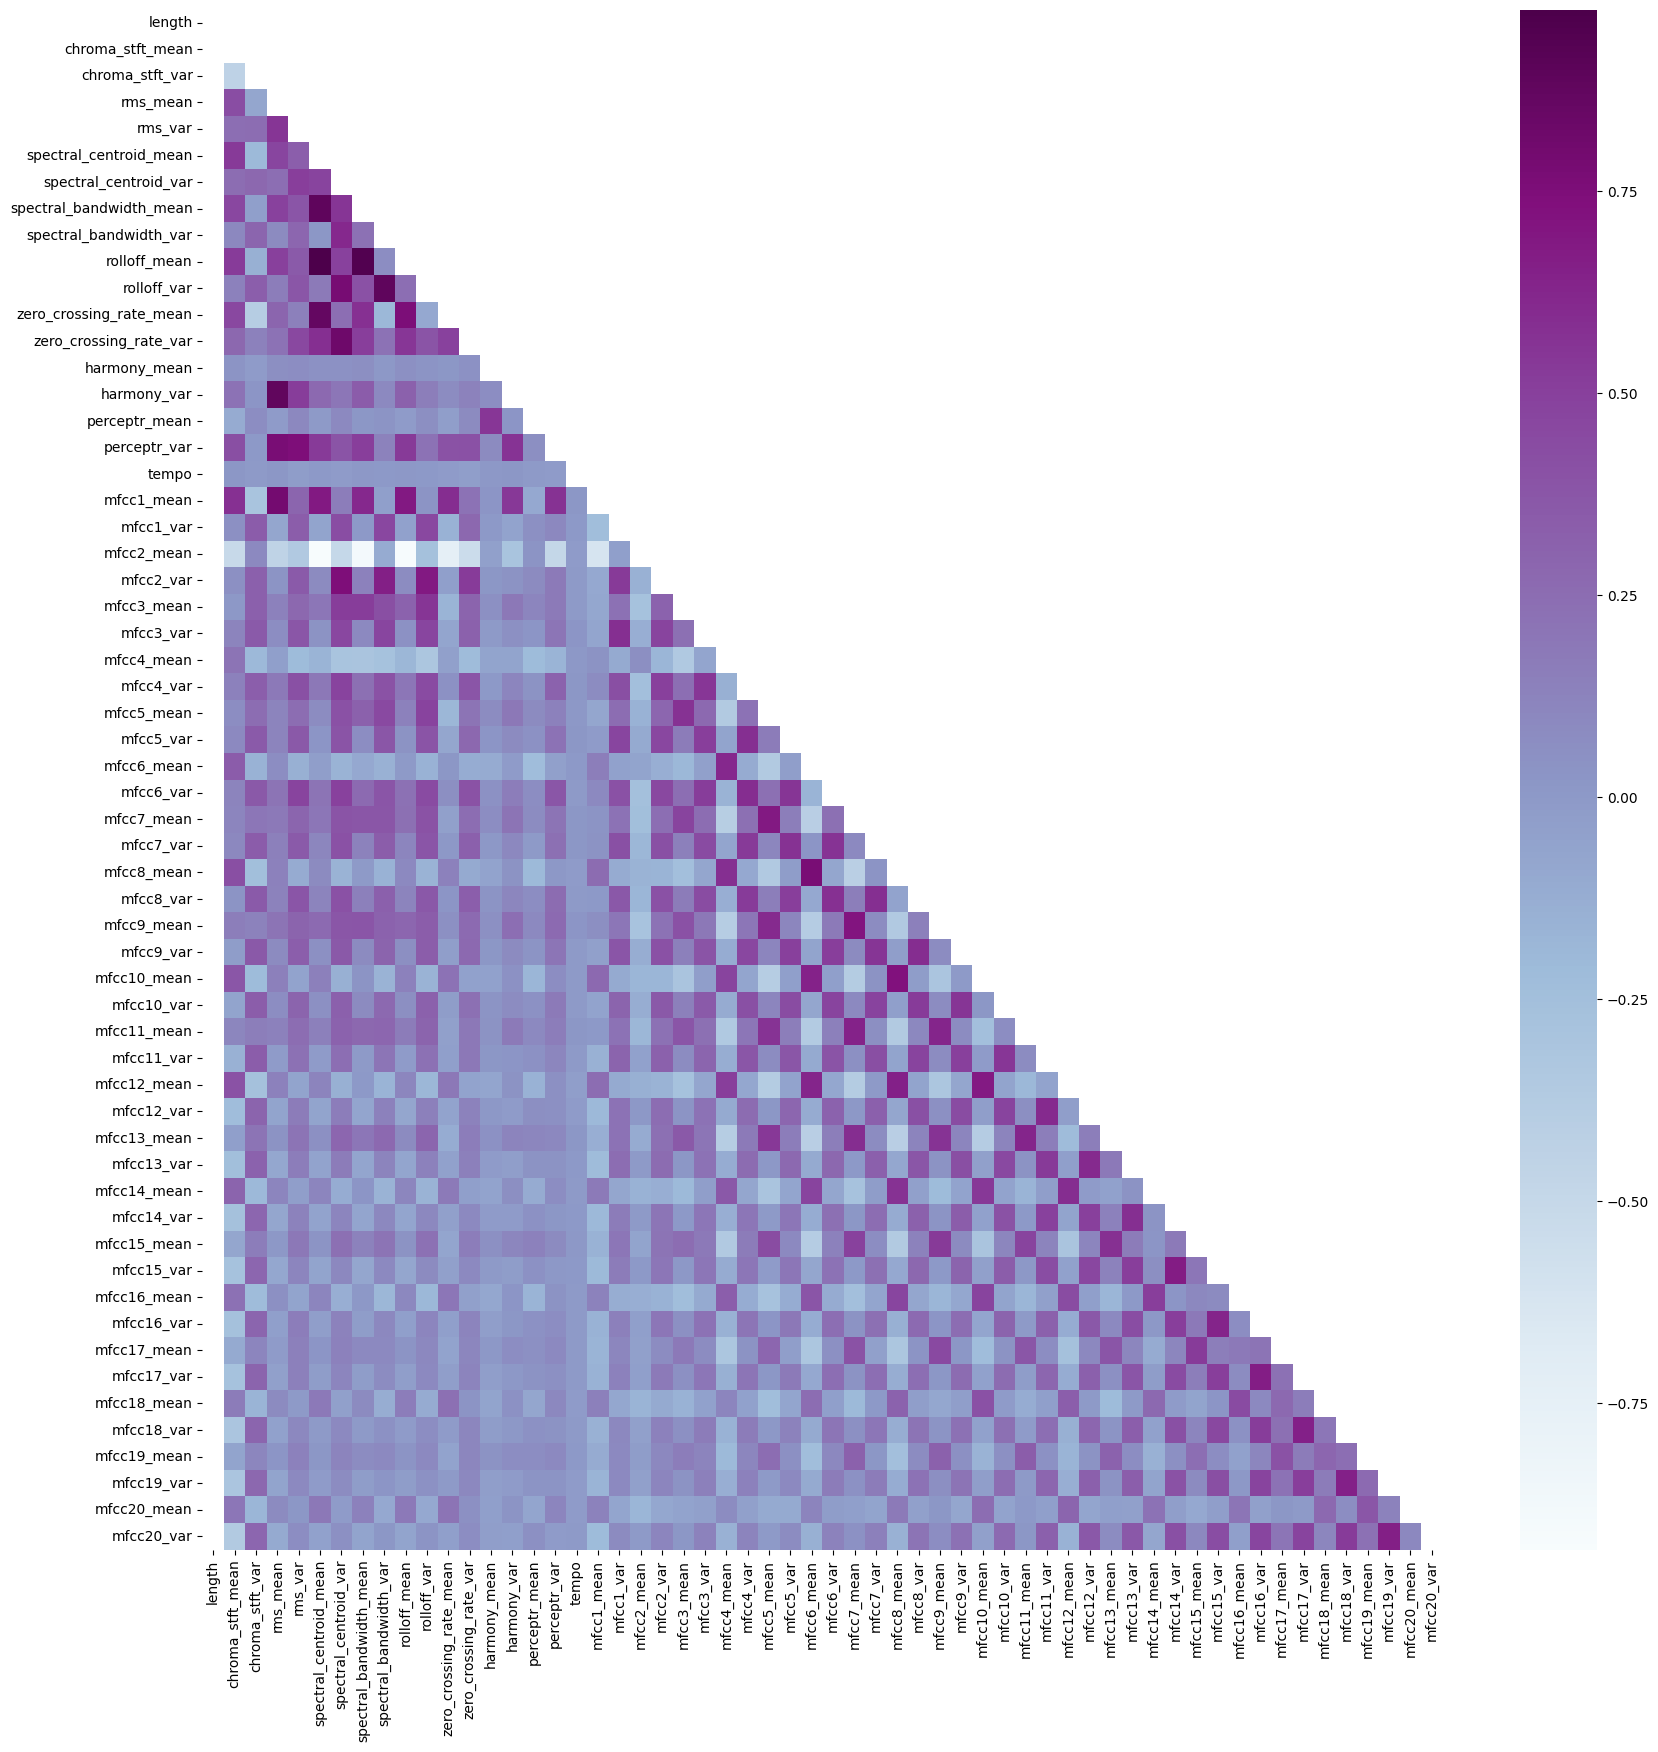

In [39]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation
corr = numeric_data.corr()

# Creation of a mask for the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="BuPu")

In [40]:
model = XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train, eval_metric="merror")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
target_names = sorted(set(y))

print(f"Training accuracy: {accuracy_score(y_train,y_pred_train)}")
print(
    f"Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}"
)
print(f"Testing accuracy: {accuracy_score(y_test,y_pred_test)}")
print(f"Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}")

Training accuracy: 0.9994023606753324
Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       665
           2       1.00      1.00      1.00       673
           3       1.00      1.00      1.00       665
           4       1.00      1.00      1.00       657
           5       1.00      1.00      1.00       705
           6       1.00      1.00      1.00       657
           7       1.00      1.00      1.00       670
           8       1.00      1.00      1.00       668
           9       1.00      1.00      1.00       675

    accuracy                           1.00      6693
   macro avg       1.00      1.00      1.00      6693
weighted avg       1.00      1.00      1.00      6693

Testing accuracy: 0.8983924780103124
Testing:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       342
           1       0.94      0.95   

<Axes: >

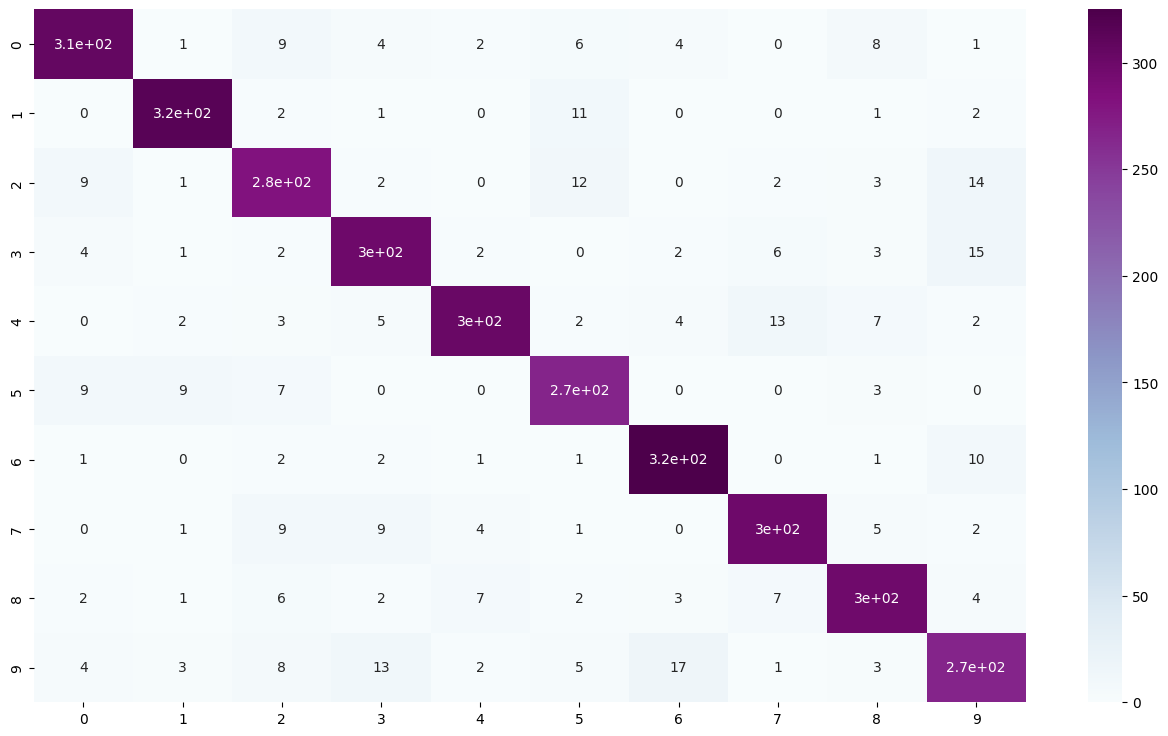

In [42]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(16, 9))
sns.heatmap(
    conf_mat,
    cmap="BuPu",
    annot=True,
    xticklabels=target_names,
    yticklabels=target_names,
)

# NN

In [43]:
# Here, we use Adam optimizer to train the model
# All of the hidden layers are using RELU activation function
# Output Layer uses softmax function

model = keras.models.Sequential(
    [
        keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [44]:
model_history = trainModel(model=model, epochs=epochs_all, optimizer="adam")

Epoch 1/500
53/53 [==============================] - 1s 8ms/step - loss: 1.6739 - accuracy: 0.3983 - val_loss: 1.1339 - val_accuracy: 0.5890
Epoch 2/500
53/53 [==============================] - 0s 5ms/step - loss: 1.1366 - accuracy: 0.6056 - val_loss: 0.8669 - val_accuracy: 0.7025
Epoch 3/500
53/53 [==============================] - 0s 5ms/step - loss: 0.9424 - accuracy: 0.6704 - val_loss: 0.7729 - val_accuracy: 0.7331
Epoch 4/500
53/53 [==============================] - 0s 5ms/step - loss: 0.7969 - accuracy: 0.7320 - val_loss: 0.6690 - val_accuracy: 0.7786
Epoch 5/500
53/53 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.7642 - val_loss: 0.6160 - val_accuracy: 0.7919
Epoch 6/500
53/53 [==============================] - 0s 5ms/step - loss: 0.6194 - accuracy: 0.7893 - val_loss: 0.5612 - val_accuracy: 0.8068
Epoch 7/500
53/53 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.8065 - val_loss: 0.5422 - val_accuracy: 0.8174
Epoch 8/500
5

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

26/26 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.9208
The test loss is : 0.5845791697502136

The test Accuracy is : 92.08371043205261


Validation Accuracy 0.92659991979599


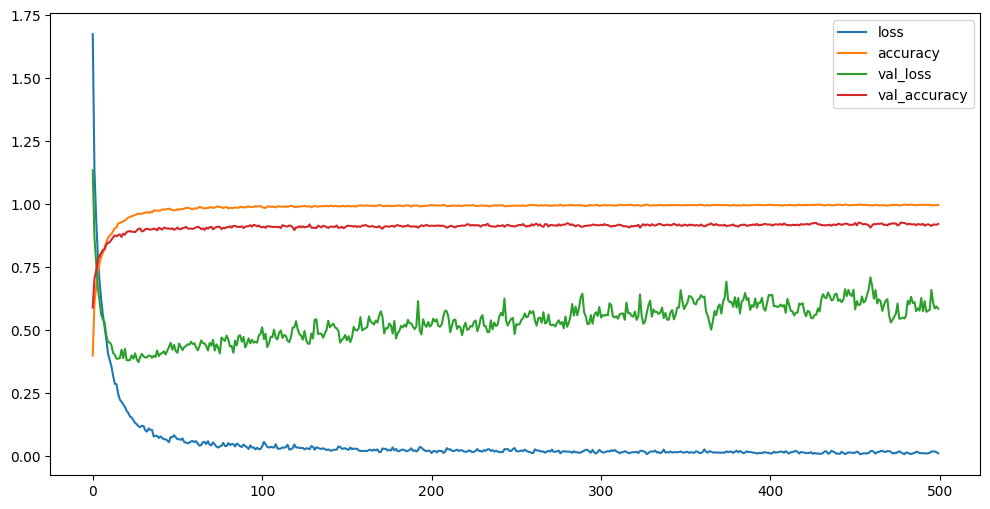

In [46]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# Deep NN

In [53]:
# Here, we use Adam optimizer to train the model
# All of the hidden layers are using RELU activation function
# Output Layer uses softmax function


dnn_model = keras.models.Sequential(
    [
        keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
print(dnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               30208     
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 512)              

In [54]:
model_history = trainModel(model=dnn_model, epochs=200, optimizer="adam")

Epoch 1/200
53/53 [==============================] - 2s 20ms/step - loss: 1.7416 - accuracy: 0.3557 - val_loss: 1.3271 - val_accuracy: 0.5235
Epoch 2/200
53/53 [==============================] - 1s 18ms/step - loss: 1.2765 - accuracy: 0.5530 - val_loss: 1.0087 - val_accuracy: 0.6488
Epoch 3/200
53/53 [==============================] - 1s 18ms/step - loss: 0.9980 - accuracy: 0.6711 - val_loss: 0.7986 - val_accuracy: 0.7219
Epoch 4/200
53/53 [==============================] - 1s 18ms/step - loss: 0.7974 - accuracy: 0.7426 - val_loss: 0.7350 - val_accuracy: 0.7662
Epoch 5/200
53/53 [==============================] - 1s 17ms/step - loss: 0.6701 - accuracy: 0.7811 - val_loss: 0.6376 - val_accuracy: 0.7938
Epoch 6/200
53/53 [==============================] - 1s 19ms/step - loss: 0.6016 - accuracy: 0.8100 - val_loss: 0.6060 - val_accuracy: 0.8016
Epoch 7/200
53/53 [==============================] - 1s 18ms/step - loss: 0.5111 - accuracy: 0.8398 - val_loss: 0.5136 - val_accuracy: 0.8374
Epoch 

In [55]:
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

26/26 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.9187
The test loss is : 0.632320761680603

The test Accuracy is : 91.87139868736267


Validation Accuracy 0.9253867268562317


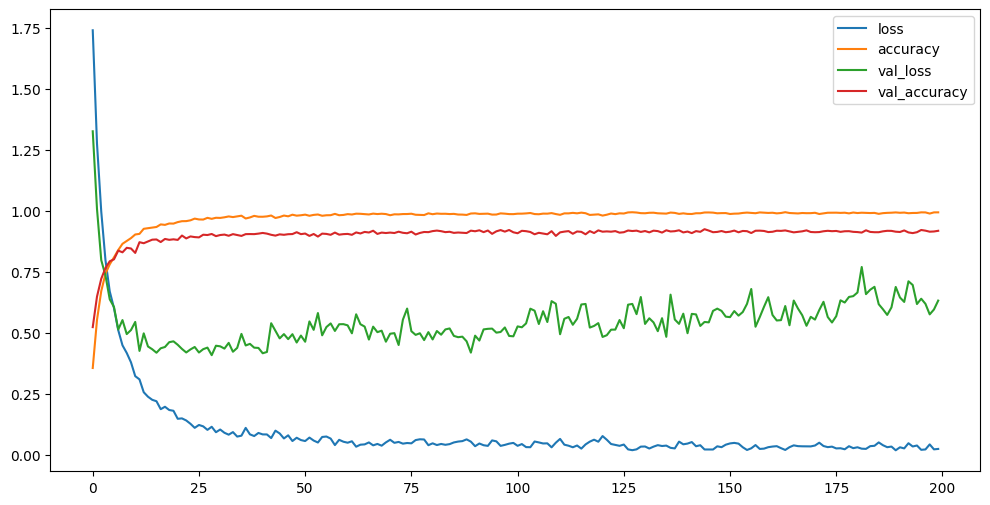

In [56]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# CNN 2

In [57]:
import numpy as np
from keras.layers import (
    Input,
    Dense,
    Activation,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dropout,
)
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st convolutional layer
x = Conv1D(filters=32, kernel_size=3, strides=1, padding="same")(inputs)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 2nd convolutional layer
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 3rd convolutional layer
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# Flatten and pass through dense layer
x = Flatten()(x)
x = Dense(units=128)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES)(x)
outputs = Activation("softmax")(outputs)

# Create model
model_cnn_2 = Model(inputs=inputs, outputs=outputs, name="CNN_1")

model_cnn_2.summary()

Model: "CNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 58, 32)            128       
                                                                 
 activation_11 (Activation)  (None, 58, 32)            0         
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 29, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 29, 64)            6208      
                                                                 
 activation_12 (Activation)  (None, 29, 64)            0         
                                                             

In [58]:
model_history = trainModel(model=model_cnn_2, epochs=epochs_all, optimizer="adam")

Epoch 1/500
53/53 [==============================] - 2s 13ms/step - loss: 1.8466 - accuracy: 0.3381 - val_loss: 1.4239 - val_accuracy: 0.4932
Epoch 2/500
53/53 [==============================] - 1s 11ms/step - loss: 1.4209 - accuracy: 0.4993 - val_loss: 1.1734 - val_accuracy: 0.6060
Epoch 3/500
53/53 [==============================] - 1s 10ms/step - loss: 1.2167 - accuracy: 0.5716 - val_loss: 1.0250 - val_accuracy: 0.6548
Epoch 4/500
53/53 [==============================] - 1s 11ms/step - loss: 1.0748 - accuracy: 0.6304 - val_loss: 0.9276 - val_accuracy: 0.6803
Epoch 5/500
53/53 [==============================] - 1s 11ms/step - loss: 0.9683 - accuracy: 0.6701 - val_loss: 0.8493 - val_accuracy: 0.7116
Epoch 6/500
53/53 [==============================] - 1s 11ms/step - loss: 0.8727 - accuracy: 0.7027 - val_loss: 0.7867 - val_accuracy: 0.7319
Epoch 7/500
53/53 [==============================] - 1s 11ms/step - loss: 0.7962 - accuracy: 0.7267 - val_loss: 0.7289 - val_accuracy: 0.7486
Epoch 

In [59]:
test_loss, test_accuracy = model_cnn_2.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

26/26 [==============================] - 0s 4ms/step - loss: 1.3795 - accuracy: 0.8729
The test loss is : 1.3795368671417236

The test Accuracy is : 87.29147911071777


Validation Accuracy 0.8777676820755005


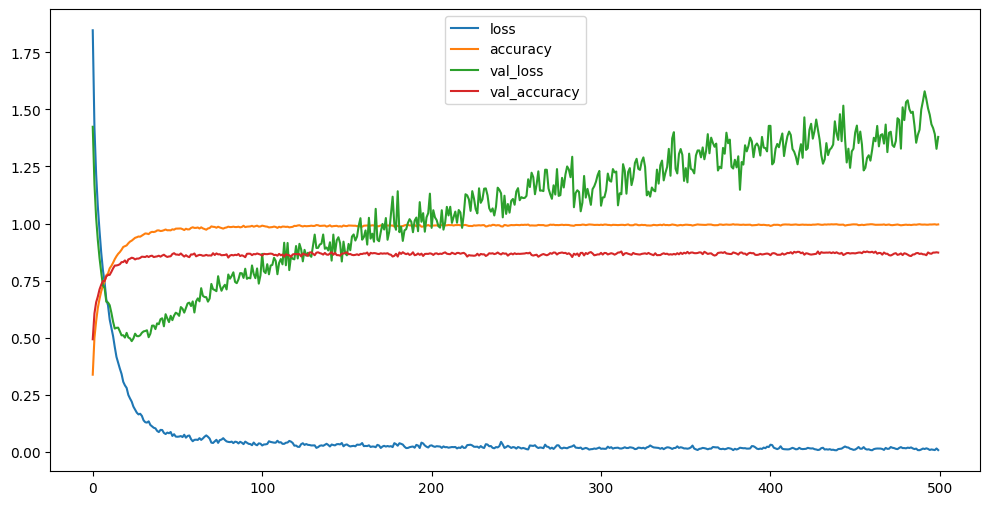

In [60]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# RNN 

In [51]:
import numpy as np
from keras.layers import Input, LSTM, Dense, Dropout
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10  # Change this to the number of classes in your dataset

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st LSTM layer
x = LSTM(units=128, return_sequences=True)(inputs)
x = Dropout(rate=0.5)(x)

# 2nd LSTM layer
x = LSTM(units=128, return_sequences=True)(x)
x = Dropout(rate=0.5)(x)

# 3rd LSTM layer
x = LSTM(units=128)(x)
x = Dropout(rate=0.5)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation="softmax")(x)

# Create model
model_rnn = Model(inputs=inputs, outputs=outputs, name="RNN_1")

model_rnn.summary()

Model: "RNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 58, 128)           66560     
                                                                 
 dropout_8 (Dropout)         (None, 58, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 58, 128)           131584    
                                                                 
 dropout_9 (Dropout)         (None, 58, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
_________________________________________________________________
 Layer (type)                Output Shape              Param 

In [ ]:
model_history = trainModel(model=model_rnn, epochs=epochs_all, optimizer="adam")

In [ ]:
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

In [ ]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# VGG

In [47]:
import numpy as np
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    Activation,
)
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10  # Change this to the number of classes in your dataset

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st block
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(inputs)
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 2nd block
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 3rd block
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# Flatten and pass through dense layers
x = Flatten()(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation="softmax")(x)

# Create model
VGG_model = Model(inputs=inputs, outputs=outputs, name="VGG")

VGG_model.summary()

Model: "VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 58, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 29, 64)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 29, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 29, 128)           49280     
                                                               

2023-10-22 06:17:56.492225: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-22 06:17:56.512458: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-22 06:17:56.516365: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-22 06:17:56.534124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-10-22 06:17:56.575719: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


In [ ]:
model_history = trainModel(model=VGG_model, epochs=epochs_all, optimizer="adam")

In [ ]:
test_loss, test_accuracy = VGG_model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

In [ ]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# ResNet

In [61]:
import numpy as np
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    Add,
    Activation,
)
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10  # Change this to the number of classes in your dataset

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st block
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(inputs)
x = Activation("relu")(x)
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 2nd block
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 3rd block
y = Conv1D(filters=256, kernel_size=1, strides=2, padding="same")(x)
y = Activation("relu")(y)
y = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(y)
y = Activation("relu")(y)
y = Conv1D(filters=256, kernel_size=1, strides=1, padding="same")(y)
y = Activation("relu")(y)

x = Conv1D(filters=256, kernel_size=1, strides=2, padding="same")(x)
x = Activation("relu")(x)

x = Add()([x, y])

# Flatten and pass through dense layers
x = Flatten()(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation="softmax")(x)

# Create model
ResNet_Model = Model(inputs=inputs, outputs=outputs, name="ResNet")

ResNet_Model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 58, 1)]              0         []                            
                                                                                                  
 conv1d_18 (Conv1D)          (None, 58, 64)               256       ['input_5[0][0]']             
                                                                                                  
 activation_16 (Activation)  (None, 58, 64)               0         ['conv1d_18[0][0]']           
                                                                                                  
 conv1d_19 (Conv1D)          (None, 58, 64)               12352     ['activation_16[0][0]']       
                                                                                             

In [ ]:
model_history = trainModel(model=ResNet_Model, epochs=epochs_all, optimizer="adam")

In [ ]:
test_loss, test_accuracy = ResNet_Model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

In [ ]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# CNN with Attention(Transformer)

In [49]:
import numpy as np
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    Add,
    Activation,
    Multiply,
)
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10  # Change this to the number of classes in your dataset

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st block
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(inputs)
x = Activation("relu")(x)
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 2nd block
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 3rd block
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)

# Self-attention block
a = Dense(units=256, activation="softmax")(x)
b = Dense(units=256, activation="softmax")(x)
c = Dense(units=256, activation="softmax")(x)

d = Multiply()([a, b, c])

x = Add()([x, d])

# Flatten and pass through dense layers
x = Flatten()(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=4096)(x)
x = Activation("relu")(x)
x = Dropout(rate=0.5)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation="softmax")(x)

# Create model
CNN_Attention_Model = Model(
    inputs=inputs, outputs=outputs, name="CNN_Transformer_model"
)

CNN_Attention_Model.summary()

Model: "CNN_Transformer_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 58, 1)]              0         []                            
                                                                                                  
 conv1d_8 (Conv1D)           (None, 58, 64)               256       ['input_2[0][0]']             
                                                                                                  
 activation_2 (Activation)   (None, 58, 64)               0         ['conv1d_8[0][0]']            
                                                                                                  
 conv1d_9 (Conv1D)           (None, 58, 64)               12352     ['activation_2[0][0]']        
                                                                              

In [ ]:
model_history = trainModel(
    model=CNN_Attention_Model, epochs=epochs_all, optimizer="adam"
)

In [ ]:
test_loss, test_accuracy = CNN_Attention_Model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

In [ ]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# Ensemble Model - ResNet & LSTM

In [64]:
import numpy as np
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    LSTM,
    Dense,
    Dropout,
    Add,
    Activation,
    Multiply,
)
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st block
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(inputs)
x = Activation("relu")(x)
x = Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 2nd block
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

# 3rd block
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding="same")(x)
x = Activation("relu")(x)

# LSTM layer
x = LSTM(units=256)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation="softmax")(x)

# Create model
Ensemble_model = Model(inputs=inputs, outputs=outputs, name="Ensemble_model")

Ensemble_model.summary()

Model: "Ensemble_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 58, 64)            256       
                                                                 
 activation_26 (Activation)  (None, 58, 64)            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 58, 64)            12352     
                                                                 
 activation_27 (Activation)  (None, 58, 64)            0         
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 29, 64)            0         
_________________________________________________________________
 Layer (type)                Output Shape           

In [ ]:
model_history = trainModel(model=Ensemble_model, epochs=epochs_all, optimizer="adam")

In [ ]:
test_loss, test_accuracy = Ensemble_model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :", test_loss)
print("\nThe test Accuracy is :", test_accuracy * 100)

In [ ]:
# Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# Conclusion

For the CNN model, we had used the Adam optimizer for training the model. The epoch that was chosen for the training model is 1500. All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function. Dropout is used to prevent overfitting. We chose the Adam optimizer because it gave us the best results after evaluating other optimizers. The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly. The accuracy we achieved for the test set is 92.78 percent which is very decent. So we come to the conclusion that Neural Networks are very effective in machine learning models. Tensorflow is very useful in implementing Convolutional Neural Network (CNN) that helps in the classifying process.